In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import numpy as np
from simtel import BlackBody, telescopes
from scipy.interpolate import interp1d

In [2]:
bb = BlackBody(10.**4.59, 10.**14.59)
# bb = BlackBody(10.**3., 10.**17.)
wl = telescopes["ZTF"].filters["g"].mean_wl
print(f"Mean ZTF g-band wl is {wl/10.:.0f} nm")
z = 0.052

Mean ZTF g-band wl is 480 nm


In [3]:
l_max = bb.peak_luminosity(wl).to("W AA-1")
print(f'{(l_max * wl * u.AA).to("erg s-1"):.2g}')

ref_l = 1.0 * 10.**43. * u.erg / (u.s)

print(f"Reference AT2019dsg nu L_nu was: ~{ref_l:.2g}")

ref_g = -18.89

new_g = bb.lum_to_abs_mag(bb.peak_luminosity_nu(wl))

print(f"The flux corresponds of a g-band magnitude of {new_g:.2f} ({ref_g:.2f} for reference)")

1.2e+43 erg / s
Reference AT2019dsg nu L_nu was: ~1e+43 erg / s
The flux corresponds of a g-band magnitude of -19.07 mag(AB) (-18.89 for reference)


In [4]:
f_max = bb.peak_flux(wl, z=z)
f_max_nu = bb.peak_flux_nu(wl, z=z).to(u.erg/(u.cm**2. * u.Hz * u.s))
print(f'{(f_max * wl * u.AA).to("erg s-1 cm-2"):.2g}')

ref_f = 1.7 * 10.**-12. * u.erg / (u.s * u.cm**2.)

print(f"Reference AT2019dsg nu F_nu was: ~{ref_f:.2g}")

ref_g = 17.85 * u.ABmag

print(f"The flux corresponds of a g-band magnitude of {f_max_nu.to(u.ABmag):.2f} ({ref_g:.2f} for reference)")

2.2e-12 erg / (cm2 s)
Reference AT2019dsg nu F_nu was: ~1.7e-12 erg / (cm2 s)
The flux corresponds of a g-band magnitude of 17.63 mag(AB) (17.85 mag(AB) for reference)


Text(0.5, 0, 'Redshift')

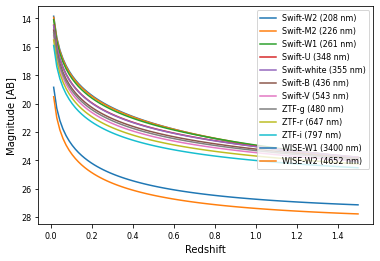

In [5]:
zrange = np.linspace(0.0, 1.5, 100)[1:]

plt.figure()


for name, tel in telescopes.items():
    for fname, f in tel.filters.items():
        y = bb.peak_flux_nu(f.mean_wl, z=zrange).to(u.ABmag)
        plt.plot(zrange, y, label=f"{name}-{fname} ({f.mean_wl/10:.0f} nm)")
        
plt.legend()
plt.gca().invert_yaxis()

plt.ylabel("Magnitude [AB]")
plt.xlabel("Redshift")

In [6]:
# zrange = np.linspace(0.0, 2.0, 100)[1:]

# plt.figure()

# y = bb.peak_flux_nu(wl, z=zrange).to(u.ABmag)
# plt.plot(zrange, y, label=f"ZTF-g ({wl/10:.0f} nm)")

# f = interp1d(y, zrange)

# plt.legend()
# plt.ylim((18., 25.))
# plt.xlim((0.0, f(23.5)))

# for mag in [19.0, 20.0, 23.0]:
#     z = f(mag)
    
#     plt.plot([0.0, z], [mag, mag], linestyle=":", color="g")
#     plt.plot([z, z], [0.0, mag], linestyle=":", color="g")
#     plt.annotate(f"z={z:.2f}", (0.02, mag+0.1), color="g")

# plt.ylabel("Magnitude [AB]")
# plt.xlabel("Redshift")

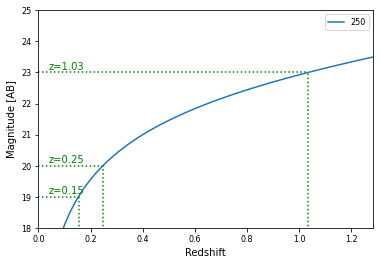

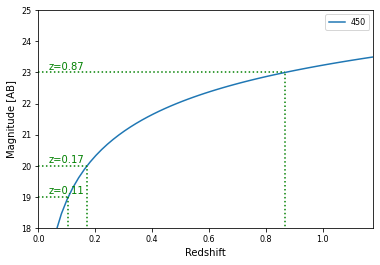

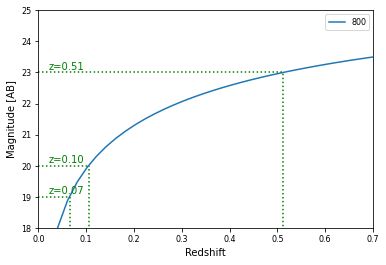

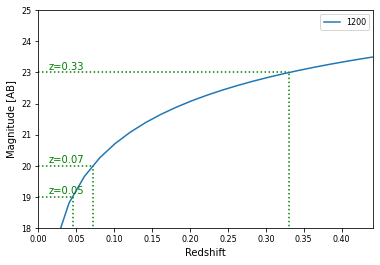

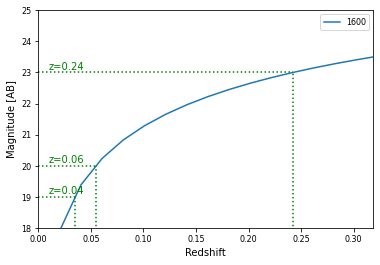

In [7]:
for wl in [2500., 4500., 8000., 12000., 16000.]:
    zrange = np.linspace(0.0, 2.0, 100)[1:]

    plt.figure()

    y = bb.peak_flux_nu(wl, z=zrange).to(u.ABmag)
    plt.plot(zrange, y, label=f"{wl/10:.0f}")

    f = interp1d(y, zrange)
    
    x_max = f(23.5)

    plt.legend()
    plt.ylim((18., 25.))
    plt.xlim((0.0, x_max))

    for mag in [19.0, 20.0, 23.0]:
        z = f(mag)

        plt.plot([0.0, z], [mag, mag], linestyle=":", color="g")
        plt.plot([z, z], [0.0, mag], linestyle=":", color="g")
        plt.annotate(f"z={z:.2f}", (0.03*x_max, mag+0.1), color="g")

    plt.ylabel("Magnitude [AB]")
    plt.xlabel("Redshift")

In [8]:
# x_max = 0.8
# zrange = np.linspace(0.0, x_max, 100)[1:]

# plt.figure()

# # for i, wl in enumerate([600., 1000., 2500., 4500., 8000., 12000., 16000.]):

# for i, wl in enumerate([600., 1000., 2500., 8000., 16000.]):


#     y = bb.peak_flux_nu(wl, z=zrange).to(u.ABmag)
#     plt.plot(zrange, y, label=f"{wl/10:.0f} nm", c=f'C{i+1}')
    
#     y2 = bb.peak_flux_nu_no_k(wl, z=zrange).to(u.ABmag)
    
#     plt.plot(zrange, y2, c=f'C{i+1}', linestyle=":")
    
# #     y2 = bb.peak_flux_nu_k(wl, z=zrange).to(u.ABmag)
    
# #     plt.plot(zrange, y2, label=f"{wl/10:.0f} nm", c=f'C{i+1}')


# plt.legend()
# plt.ylim((18., 25.))
# plt.xlim((0.0, x_max))


# plt.ylabel("Magnitude [AB]")
# plt.xlabel("Redshift")

Text(0.5, 0, 'Redshift')

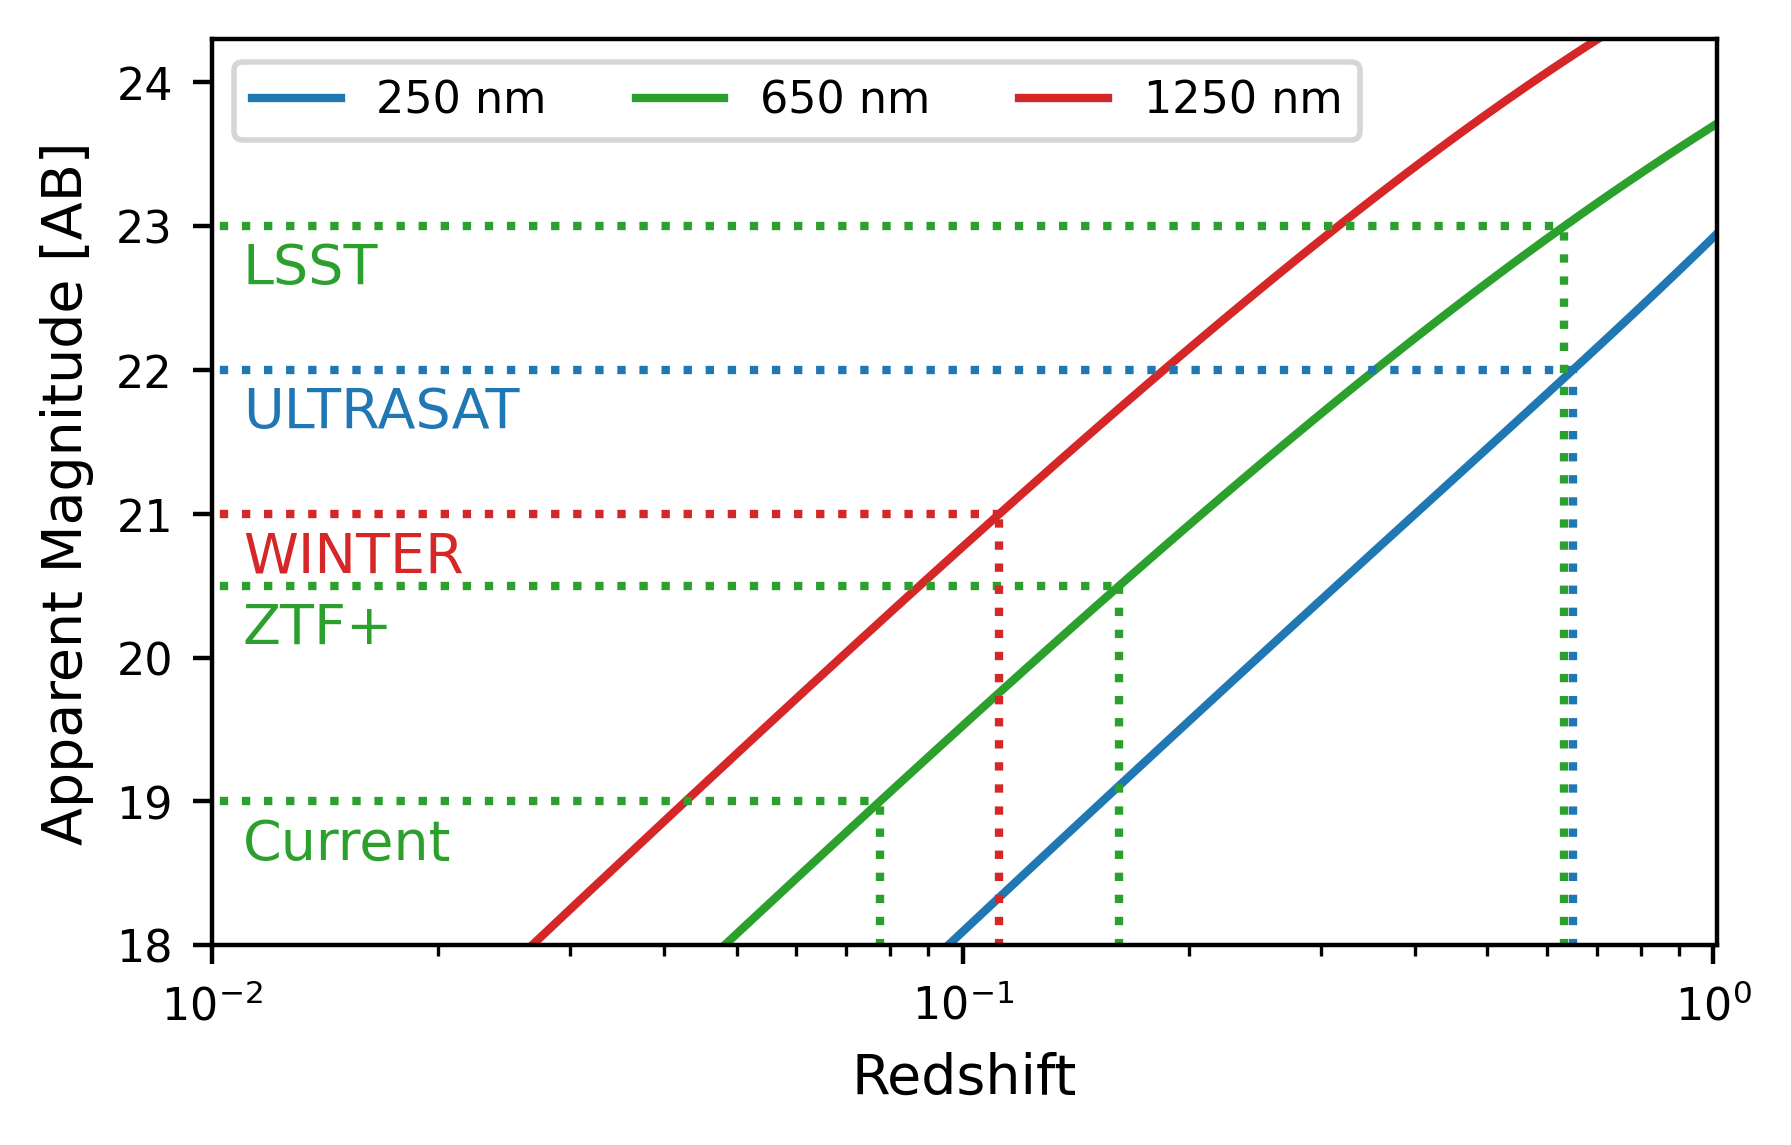

In [9]:
x_max = 1.01
zrange = np.linspace(0.0, x_max, 100)[1:]


figscale = 3.
plt.figure(figsize=(figscale*1.618, figscale), dpi=400.)

fs =[]

cs = [0, 2, 3]

for i, wl in enumerate([2500., 6500., 12500.]):
    
    y2 = bb.peak_flux_nu(wl, z=zrange).to(u.ABmag)
    
    plt.plot(zrange, y2, label=f"{wl/10:.0f} nm", c=f'C{cs[i]}')
    
    fs.append(interp1d(y2, zrange))
    
#     y2 = bb.peak_flux_nu_k(wl, z=zrange).to(u.ABmag)
    
#     plt.plot(zrange, y2, label=f"{wl/10:.0f} nm", c=f'C{i+1}')

tels = [
    ("ULTRASAT", 22.0, 1, 1),
    ("Current", 19.0, 2, 1),
    ("ZTF+", 20.5, 2, 1),
    ("LSST", 23.0, 2, 1),
    ("WINTER", 21.0, 3, 1),
]

for name, lim_mag, i, up in tels:
    
    z = fs[i-1](lim_mag)
        
    plt.plot([0.0, z], [lim_mag, lim_mag], linestyle=":", color=f'C{cs[i-1]}')
    plt.plot([z, z], [0.0, lim_mag], linestyle=":", color=f'C{cs[i-1]}')
    
    z_0 = 0.011
    
    if up:
        plt.annotate(name, (z_0, lim_mag-0.4), color=f'C{cs[i-1]}')
    else:
        plt.annotate(name, (z_0, lim_mag+0.1), color=f'C{cs[i-1]}')
    


plt.legend(ncol=3)
plt.ylim((18., 24.3))
plt.xlim((0.01, x_max))
plt.xscale("log")


plt.ylabel("Apparent Magnitude [AB]")
plt.xlabel("Redshift")